In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

In [2]:
import scienceplots
plt.style.use('science')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
from matplotlib.colors import LinearSegmentedColormap

colors = [
    [176, 91, 155],
    [150, 122, 173],
    [121, 95, 165],
    [96, 78, 166],
    [88, 95, 196],
    [91, 142, 215],
    [112, 169, 226],
    [142, 191, 240],
    [176, 211, 253],
    [101, 143, 204]  
]
colors = np.array(colors) / 255.0
cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=256)

gnn_color = colors[0]  
segnn_color = colors[3]  
segnn_lmax2_color = colors[2] 
nequip_color = colors[6]  
nequip_lmax2_color = colors[5]  


In [4]:
n_list = [4, 64, 256, 1248, 6304,]# 32000]

models_dir = Path('velocity_task_consistent_trees/')

def read_loss(model, n, dataset):
    with open(models_dir / f'{model}_{n}_f1.0' / f'loss_dict.pkl', 'rb') as f:
        f = pickle.load(f)
    return f[f'{dataset}_loss']


def get_losses_for_model(model, n_list):
    test_losses = []
    for n in n_list:
        test_losses.append(read_loss(model, n, 'test'))
    return test_losses

In [5]:
gnn_losses = get_losses_for_model('gnn', n_list)
segnn_losses = get_losses_for_model('segnn', n_list)
nequip_losses = get_losses_for_model('nequip', n_list)
segnn_lmax2_losses = get_losses_for_model('segnn_l2', n_list)
nequip_l2_losses = get_losses_for_model('nequip_l2', n_list)

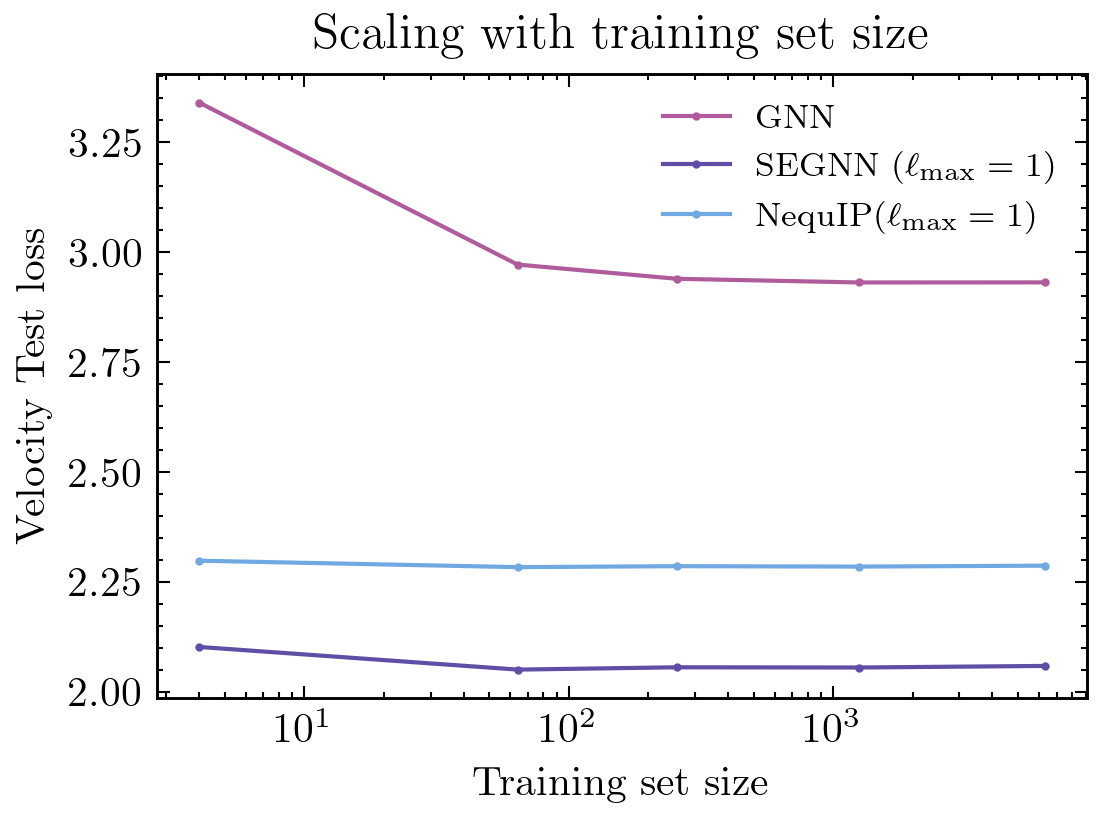

In [6]:
plt.figure(figsize=(4., 2.7)) 
plt.semilogx(n_list, gnn_losses, marker='o', markersize=1, label='GNN', color=gnn_color)
plt.semilogx(n_list, segnn_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=1$)', color=segnn_color)
plt.semilogx(n_list, nequip_losses, marker='o', markersize=1, label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.legend(fontsize=8)
plt.ylabel('Velocity Test loss')
plt.xlabel('Training set size')
plt.title('Scaling with training set size')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
plt.savefig('figures/scaling.pdf', bbox_inches='tight')

In [7]:
gnn_losses = read_loss('gnn', 1248, 'train',)
segnn_losses = read_loss('segnn', 1248, 'train',)
segnn_lmax2_losses = read_loss('segnn_l2', 1248,'train')
nequip_losses = read_loss('nequip', 1248, 'train',)
nequip_lmax2_losses = read_loss('nequip_l2', 1248, 'train',)

test_gnn_losses = read_loss('gnn', 1248, 'test',)
test_segnn_losses = read_loss('segnn', 1248, 'test',)
test_segnn_lmax2_losses = read_loss('segnn_l2', 1248,'test')
test_nequip_losses = read_loss('nequip', 1248, 'test',)
test_nequip_lmax2_losses = read_loss('nequip_l2', 1248, 'test',)



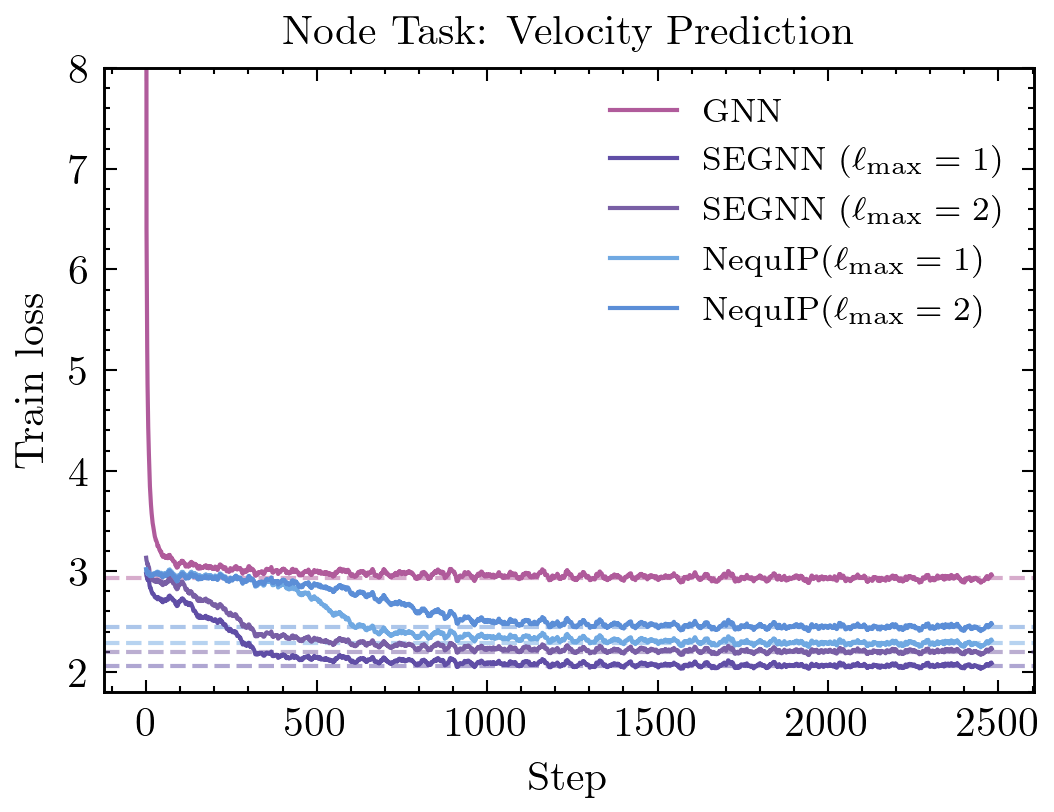

In [8]:
ds = 20
plt.figure(figsize=(4., 2.7)) 
plt.axhline(test_gnn_losses, color=gnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_losses, color=segnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_lmax2_losses, color=segnn_lmax2_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_losses, color=nequip_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_lmax2_losses, color=nequip_lmax2_color, linestyle='--', alpha=0.5)
plt.plot(np.convolve(gnn_losses, np.ones(ds)/ds, mode='valid'), label='GNN', color=gnn_color)
plt.plot(np.convolve(segnn_losses, np.ones(ds)/ds, mode='valid'),  label='SEGNN ($\ell_\mathrm{max}=1$)',  color=segnn_color)
plt.plot(np.convolve(segnn_lmax2_losses, np.ones(ds)/ds, mode='valid'), label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_lmax2_color)
plt.plot(np.convolve(nequip_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.plot(np.convolve(nequip_lmax2_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=2$)', color=nequip_lmax2_color)
plt.legend(fontsize=8, fancybox=True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.title('Node Task: Velocity Prediction', fontsize=10, fontweight='bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
plt.ylim(1.8,8.)
plt.savefig('figures/velocity_train_loss.pdf', bbox_inches='tight')